<a href="https://colab.research.google.com/github/4zmyyy/Belajarpyhton/blob/main/Python_Learning_Day_4_try_again_and_repeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install TensorFlow (untuk model Transformer)
!pip install tensorflow

# Install Matplotlib (untuk visualisasi)
!pip install matplotlib

# Install Imagemagick (untuk membuat GIF animasi)
!apt-get update
!apt-get install imagemagick

# Cek versi Imagemagick untuk memastikan instalasi berhasil
!convert --version

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,317 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,659 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

In [7]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [8]:
!pip install --upgrade tensorflow

In [9]:
from tensorflow.keras.layers import MultiHeadAttention
print("MultiHeadAttention is available!")

MultiHeadAttention is available!


In [10]:
# Simulasi input data
sequence_length = 10  # Panjang urutan (misalnya kalimat dengan 10 kata)
embedding_dim = 8     # Dimensi embedding (fitur per kata)

# Buat input dummy
x = tf.random.uniform((1, sequence_length, embedding_dim))  # Batch size 1
print("Input shape:", x.shape)

Input shape: (1, 10, 8)


In [11]:
# Simulasi input data
sequence_length = 10  # Panjang urutan (misalnya kalimat dengan 10 kata)
embedding_dim = 8     # Dimensi embedding (fitur per kata)

# Buat input dummy
x = tf.random.uniform((1, sequence_length, embedding_dim))  # Batch size 1
print("Input shape:", x.shape)

# Membuat layer MultiHeadAttention
multi_head_attention = MultiHeadAttention(num_heads=2, key_dim=embedding_dim)

# Forward pass untuk mendapatkan attention weights
try:
    output, attention_weights = multi_head_attention(query=x, value=x, return_attention_scores=True)
    print("Success!")
except Exception as e:
    print("Error:", e)

# Ekstrak attention weights
attention_weights = attention_weights.numpy().squeeze()  # Shape: (num_heads, seq_len, seq_len)
print("Attention weights shape:", attention_weights.shape)

Input shape: (1, 10, 8)
Success!
Attention weights shape: (2, 10, 10)


In [16]:
# Import library utama
import tensorflow as tf
from tensorflow.keras.layers import MultiHeadAttention
import matplotlib.pyplot as plt  # Pastikan ini ada!
import numpy as np
from matplotlib.animation import FuncAnimation

# Konfigurasi Matplotlib untuk menggunakan Imagemagick
import matplotlib
matplotlib.rcParams['animation.writer'] = 'imagemagick'

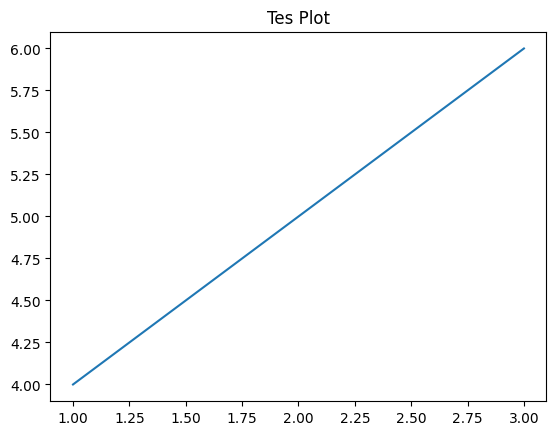

In [18]:
# Tes apakah plt bisa digunakan
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Tes Plot")
plt.show()

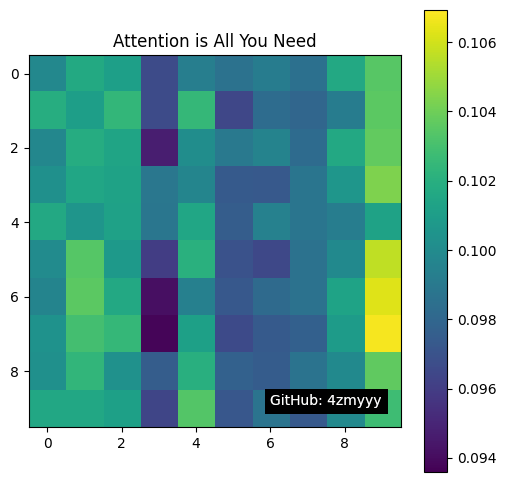

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# Visualisasi animasi attention weights
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(attention_weights[0], cmap='viridis', interpolation='nearest')
ax.set_title("Attention is All You Need", fontsize=12, color='black')  # Judul tetap
cbar = fig.colorbar(im)

# Fungsi inisialisasi untuk animasi
def init():
    im.set_data(np.zeros_like(attention_weights[0]))
    return [im]

# Fungsi update untuk animasi
def update(frame):
    im.set_data(attention_weights[frame % len(attention_weights)])  # Loop melalui setiap head

    # Ganti judul menjadi "Attention is All You Need"
    ax.set_title("Attention is All You Need", fontsize=12, color='black')

    # Tambahkan teks nama akun GitHub di pojok kanan bawah
    ax.text(0.95, 0.05, "GitHub: 4zmyyy", fontsize=10, color='white',
            ha='right', va='bottom', transform=ax.transAxes,
            bbox=dict(facecolor='black', alpha=0.5, edgecolor='none'))

    return [im]

# Buat animasi
ani = FuncAnimation(fig, update, frames=len(attention_weights) * 3, init_func=init, blit=True, interval=1000)

# Simpan animasi sebagai GIF
ani.save('transformer_attention.gif', writer='imagemagick', fps=1)

# Tampilkan animasi di notebook
plt.show()

# Download file GIF jika perlu
from google.colab import files
files.download('transformer_attention.gif')